# 類別

In [1]:
# 預處理
import numpy as np

import pandas as pd
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras import models 
from keras import layers
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
from keras import backend as K
from keras.layers import Dense, Activation, Flatten
from matplotlib import pyplot as plt
import tensorflow as tf

dataset = pd.read_csv('Part1Data.csv')

In [2]:
# 設定答案
dataset_target = dataset.pop('IsoverAVE')
dataset = dataset.drop("Zone1PowerConsumption",axis = 1)
dataset = dataset.drop("Zone2PowerConsumption",axis = 1)
dataset = dataset.drop("Zone3PowerConsumption",axis = 1)
# 定義
def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

In [3]:
# 分割資料
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( dataset , dataset_target , test_size = 0.2)
print(X_train.shape , X_test.shape)

(41932, 5) (10484, 5)


In [4]:
# 正規化
X_train = X_train.values.reshape(41932, 5)
X_test = X_test.values.reshape(10484, 5)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#正規化測試資料 (0到1之間)
X_train /= 255
X_test /= 255

#標籤向量化
Y_train = np.asarray(Y_train).astype('float32')
Y_test = np.asarray(Y_test).astype('float32')

In [5]:
#建構模型
network = models.Sequential()
network.add(layers.Dense(1000, activation='relu', input_shape=(X_train.shape[1],)))
network.add(layers.Dense(10, activation='relu'))
network.add(layers.Dense(1, activation='sigmoid'))
network.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics=['acc',precision, recall])
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1000)              6000      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                10010     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 16,021
Trainable params: 16,021
Non-trainable params: 0
_________________________________________________________________


In [6]:
history = network.fit(X_train,Y_train,
epochs=50,
batch_size=250,validation_data=(X_test, Y_test))

Epoch 1/50
168/168 [==============================] - 0s 2ms/step - loss: 0.6325 - acc: 0.6265 - precision: 0.6678 - recall: 0.5016 - val_loss: 0.6165 - val_acc: 0.6527 - val_precision: 0.6554 - val_recall: 0.6199
Epoch 2/50
168/168 [==============================] - 0s 974us/step - loss: 0.6051 - acc: 0.6580 - precision: 0.6842 - recall: 0.5883 - val_loss: 0.6049 - val_acc: 0.6534 - val_precision: 0.7092 - val_recall: 0.4996
Epoch 3/50
168/168 [==============================] - 0s 951us/step - loss: 0.5970 - acc: 0.6660 - precision: 0.6816 - recall: 0.6254 - val_loss: 0.5963 - val_acc: 0.6634 - val_precision: 0.6960 - val_recall: 0.5598
Epoch 4/50
168/168 [==============================] - 0s 947us/step - loss: 0.5930 - acc: 0.6660 - precision: 0.6790 - recall: 0.6355 - val_loss: 0.6089 - val_acc: 0.6548 - val_precision: 0.6139 - val_recall: 0.8030
Epoch 5/50
168/168 [==============================] - 0s 982us/step - loss: 0.5906 - acc: 0.6661 - precision: 0.6745 - recall: 0.6472 - va

Epoch 39/50
168/168 [==============================] - 0s 970us/step - loss: 0.5592 - acc: 0.6910 - precision: 0.7161 - recall: 0.6386 - val_loss: 0.5597 - val_acc: 0.6878 - val_precision: 0.7118 - val_recall: 0.6133
Epoch 40/50
168/168 [==============================] - 0s 988us/step - loss: 0.5583 - acc: 0.6910 - precision: 0.7178 - recall: 0.6362 - val_loss: 0.5606 - val_acc: 0.6857 - val_precision: 0.6848 - val_recall: 0.6667
Epoch 41/50
168/168 [==============================] - 0s 976us/step - loss: 0.5577 - acc: 0.6905 - precision: 0.7171 - recall: 0.6338 - val_loss: 0.5666 - val_acc: 0.6849 - val_precision: 0.6708 - val_recall: 0.7037
Epoch 42/50
168/168 [==============================] - 0s 964us/step - loss: 0.5576 - acc: 0.6913 - precision: 0.7193 - recall: 0.6342 - val_loss: 0.5592 - val_acc: 0.6880 - val_precision: 0.7229 - val_recall: 0.5924
Epoch 43/50
168/168 [==============================] - 0s 964us/step - loss: 0.5566 - acc: 0.6915 - precision: 0.7203 - recall: 0.63

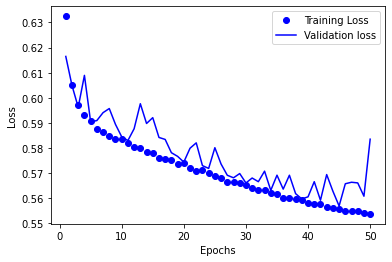

In [7]:
loss = history.history["loss"]
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, "bo", label ="Training Loss")
plt.plot(epochs, history.history['val_loss'], 'b', label='Validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [8]:
preds = network.evaluate(x = X_test, y = Y_test)

F1 = 2 * (preds[2] * preds[3]) / (preds[2] + preds[3])
print('Precision', preds[2])
print('Recall', preds[3])
print('F1',F1)

328/328 [==============================] - 0s 390us/step - loss: 0.5835 - acc: 0.6790 - precision: 0.6564 - recall: 0.7321
Precision 0.6564362049102783
Recall 0.7321454286575317
F1 0.6922268810303821


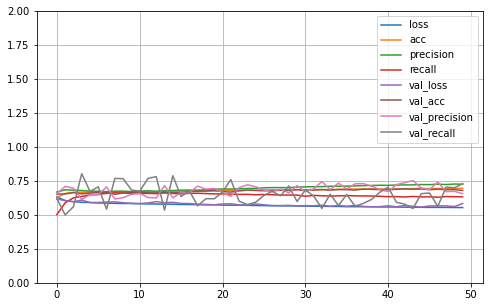

In [9]:
pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.show()

# 數值

In [10]:
from sklearn.metrics import mean_squared_error #MSE
from sklearn.metrics import mean_absolute_error #MAE
from sklearn.metrics import mean_absolute_percentage_error#MAPE
import tensorflow as tf
def MAE(y_true, predictions):
    y_true, predictions = np.array(y_true), np.array(predictions)
    return np.mean(np.abs(y_true - predictions))

def MSE(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.square(np.subtract(actual,pred)).mean() 

def MAPE(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true))

In [11]:
#匯入資料
dataset = pd.read_csv('Part1Data.csv')

In [12]:
# 設定答案
dataset_target = dataset.pop('Zone1PowerConsumption')
#丟棄不需用到的資料
dataset = dataset.drop("Zone2PowerConsumption",axis = 1)
dataset = dataset.drop("Zone3PowerConsumption",axis = 1)
dataset = dataset.drop("IsoverAVE",axis = 1)

In [13]:
#正規化
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dataset_1 = scaler.fit_transform(dataset)
dataset_2 = pd.DataFrame(dataset_1,columns=dataset.columns)
dataset_2


,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows
0,0.090091,0.748382,0.005130,0.000040,0.000115
1,0.086146,0.756770,0.005130,0.000057,0.000079
2,0.083399,0.756770,0.004663,0.000050,0.000095
3,0.078176,0.762761,0.005130,0.000075,0.000091
4,0.072736,0.771148,0.004819,0.000038,0.000079
...,...,...,...,...,...
52411,0.102358,0.731608,0.004663,0.000031,0.000091
52412,0.100645,0.734004,0.004974,0.000040,0.000088
52413,0.099366,0.736401,0.005596,0.000069,0.000067
52414,0.095504,0.738797,0.004663,0.000053,0.000083


In [14]:
# 分割資料
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( dataset , dataset_target , test_size = 0.2)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(Y_test.shape)

(41932, 5)
(10484, 5)
(10484,)


In [16]:
#建立Sequential物件
network = models.Sequential()
network.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dense(1))
network.compile(optimizer='RMSprop', loss='mse',metrics=[tf.keras.metrics.mae,tf.keras.metrics.mape,tf.metrics.mse] )
network.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                384       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 4,609
Trainable params: 4,609
Non-trainable params: 0
_________________________________________________________________


In [17]:
history = network.fit(X_train,Y_train,
epochs=50,
batch_size=50)

Epoch 1/50
839/839 [==============================] - 0s 465us/step - loss: 392326912.0000 - mean_absolute_error: 15721.8779 - mean_absolute_percentage_error: 48.3186 - mean_squared_error: 392326944.0000
Epoch 2/50
839/839 [==============================] - 0s 443us/step - loss: 62327376.0000 - mean_absolute_error: 6344.5791 - mean_absolute_percentage_error: 20.1990 - mean_squared_error: 62327376.0000
Epoch 3/50
839/839 [==============================] - 0s 442us/step - loss: 54172704.0000 - mean_absolute_error: 5891.1958 - mean_absolute_percentage_error: 18.8026 - mean_squared_error: 54172704.0000
Epoch 4/50
839/839 [==============================] - 0s 458us/step - loss: 51488268.0000 - mean_absolute_error: 5727.3716 - mean_absolute_percentage_error: 18.3088 - mean_squared_error: 51488268.0000
Epoch 5/50
839/839 [==============================] - 0s 441us/step - loss: 50315296.0000 - mean_absolute_error: 5655.6689 - mean_absolute_percentage_error: 18.1009 - mean_squared_error: 503152

839/839 [==============================] - 0s 469us/step - loss: 38667388.0000 - mean_absolute_error: 4935.6465 - mean_absolute_percentage_error: 15.9324 - mean_squared_error: 38667388.0000
Epoch 42/50
839/839 [==============================] - 0s 467us/step - loss: 38528900.0000 - mean_absolute_error: 4932.7114 - mean_absolute_percentage_error: 15.9222 - mean_squared_error: 38528900.0000
Epoch 43/50
839/839 [==============================] - 0s 466us/step - loss: 38373444.0000 - mean_absolute_error: 4922.5229 - mean_absolute_percentage_error: 15.8943 - mean_squared_error: 38373444.0000
Epoch 44/50
839/839 [==============================] - 0s 464us/step - loss: 38226248.0000 - mean_absolute_error: 4911.7554 - mean_absolute_percentage_error: 15.8657 - mean_squared_error: 38226244.0000
Epoch 45/50
839/839 [==============================] - 0s 465us/step - loss: 38124332.0000 - mean_absolute_error: 4906.4766 - mean_absolute_percentage_error: 15.8554 - mean_squared_error: 38124328.0000
Ep

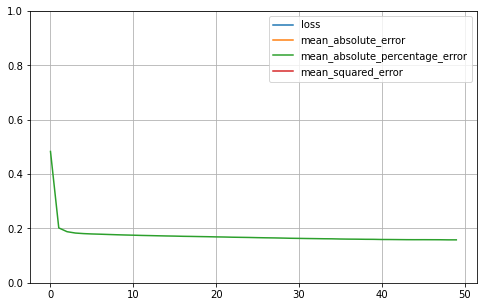

In [18]:
history.history['mean_absolute_percentage_error']=list(map(lambda x:x/100, history.history['mean_absolute_percentage_error']))
pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [19]:
network.predict(X_test)

array([[34850.242],
       [37339.37 ],
       [41034.207],
       ...,
       [29089.248],
       [29720.375],
       [27937.139]], dtype=float32)

In [20]:
Y_test

32423    28736.07103
24854    37865.96026
30211    41653.15615
23307    44147.28477
28050    33985.91362
            ...     
19454    25255.86885
15396    40512.20667
15564    24565.25296
7755     44682.71186
16728    25210.07535
Name: Zone1PowerConsumption, Length: 10484, dtype: float64

Y_test.to_csv("AdultsDataSet_Finaltrain.csv",index=False)